In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the 'gas consumption' csv file into a DataFrame
gas_csmp = pd.read_csv('../data/clean_data/Gas Consumption - EJ-YearFixed-Python.csv') # , index_col=0
gas_csmp.head()

,Year,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,0.03,0.15,NaN,0.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.03,14.97,4.38,NaN,0.27,NaN,NaN
1,1966,0.03,0.16,NaN,0.07,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.03,16.14,4.89,NaN,0.28,NaN,0.01
2,1967,0.03,0.17,NaN,0.06,NaN,NaN,NaN,0.02,NaN,...,NaN,NaN,0.02,0.05,17.04,5.38,NaN,0.31,NaN,0.01
3,1968,0.03,0.19,NaN,0.07,NaN,NaN,NaN,0.04,NaN,...,NaN,NaN,0.02,0.11,18.24,5.81,NaN,0.32,NaN,0.01
4,1969,0.04,0.19,0.01,0.08,NaN,NaN,NaN,0.09,NaN,...,NaN,NaN,0.02,0.22,19.63,6.21,NaN,0.33,NaN,NaN


In [3]:
# Replace all the blanks (or NaN) with zero
clean_gas_csmp = gas_csmp.replace(np.nan,0)
clean_gas_csmp.tail()

,Year,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Brazil,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
50,2015,1.37,1.68,1.52,0.29,0.40,0.93,0.64,0.57,1.55,...,0.91,1.15,2.58,2.59,26.77,0.0,1.67,1.33,0.37,0.86
51,2016,1.39,1.74,1.50,0.30,0.39,0.95,0.64,0.58,1.34,...,0.90,1.13,2.62,2.90,26.97,0.0,1.56,1.34,0.37,0.76
52,2017,1.42,1.74,1.48,0.33,0.38,0.96,0.66,0.59,1.35,...,0.89,1.09,2.69,2.83,26.64,0.0,1.55,1.39,0.34,0.79
53,2018,1.56,1.75,1.49,0.31,0.39,0.99,0.70,0.61,1.29,...,1.02,1.10,2.68,2.85,29.52,0.0,1.60,1.14,0.35,0.84
54,2019,1.63,1.71,1.93,0.32,0.42,1.24,0.69,0.63,1.29,...,1.14,1.02,2.74,2.84,30.48,0.0,1.56,0.95,0.35,0.86


In [4]:
# Read the 'world population' csv file into pandas; adding in 'Population' feature
global_pop = pd.read_csv('../data/clean_data/WorldPopulationbyYear.csv')
global_pop.tail()

,Year,World
55,2015,7338964960
56,2016,7424282488
57,2017,7509065705
58,2018,7591932907
59,2019,7673533972


In [5]:
# Merge the 'gas consumption' with 'world population by year'; adding in 'Population' feature
gas_pop = global_pop.merge(clean_gas_csmp, on="Year")
gas_pop.head()

,Year,World,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,3322973367,0.03,0.15,0.00,0.06,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.03,14.97,4.38,0.0,0.27,0.0,0.00
1,1966,3393031801,0.03,0.16,0.00,0.07,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.03,16.14,4.89,0.0,0.28,0.0,0.01
2,1967,3462460201,0.03,0.17,0.00,0.06,0.0,0.0,0.0,0.02,...,0.0,0.0,0.02,0.05,17.04,5.38,0.0,0.31,0.0,0.01
3,1968,3532826854,0.03,0.19,0.00,0.07,0.0,0.0,0.0,0.04,...,0.0,0.0,0.02,0.11,18.24,5.81,0.0,0.32,0.0,0.01
4,1969,3607499991,0.04,0.19,0.01,0.08,0.0,0.0,0.0,0.09,...,0.0,0.0,0.02,0.22,19.63,6.21,0.0,0.33,0.0,0.00


In [6]:
# Renaming columns 
# new_df = df.rename(columns={"A": "a", "B": "c"})
gas_pop = gas_pop.rename(columns={"World": "World Population", "Total World": "World Exajoules"})
gas_pop.head()

,Year,World Population,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,3322973367,0.03,0.15,0.00,0.06,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.03,14.97,4.38,0.0,0.27,0.0,0.00
1,1966,3393031801,0.03,0.16,0.00,0.07,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.03,16.14,4.89,0.0,0.28,0.0,0.01
2,1967,3462460201,0.03,0.17,0.00,0.06,0.0,0.0,0.0,0.02,...,0.0,0.0,0.02,0.05,17.04,5.38,0.0,0.31,0.0,0.01
3,1968,3532826854,0.03,0.19,0.00,0.07,0.0,0.0,0.0,0.04,...,0.0,0.0,0.02,0.11,18.24,5.81,0.0,0.32,0.0,0.01
4,1969,3607499991,0.04,0.19,0.01,0.08,0.0,0.0,0.0,0.09,...,0.0,0.0,0.02,0.22,19.63,6.21,0.0,0.33,0.0,0.00


In [7]:
# Adding in 'GDP' as a feature
# Read the 'GDP' csv file into pandas
gdp_percent = pd.read_csv('../data/clean_data/GDP%-YearFixed-Python.csv', encoding = 'ISO-8859-1')
gdp_percent.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,19.454687,25.819058,50.781142,NaN,NaN,34.202489,NaN,29.725798,17.070705,...,26.064980,NaN,NaN,27.676728,NaN,21.126805,24.297531,NaN,42.791494,10.035640
51,2016,17.808790,25.223825,50.778208,NaN,NaN,27.214708,NaN,29.609790,17.663228,...,26.370120,NaN,NaN,26.578058,NaN,21.056630,23.913640,NaN,38.206219,9.861371
52,2017,19.174225,25.094501,48.048795,NaN,NaN,24.130305,NaN,28.096348,18.757232,...,29.473116,NaN,NaN,26.582114,NaN,22.800229,24.222791,NaN,41.003028,9.702188
53,2018,18.958521,NaN,47.110681,NaN,NaN,17.869421,NaN,26.093365,20.965838,...,37.642509,NaN,NaN,26.533055,NaN,24.192831,24.382773,NaN,38.390521,9.347354
54,2019,17.754955,NaN,44.334419,NaN,NaN,NaN,NaN,NaN,18.166368,...,39.803700,NaN,NaN,26.843839,NaN,NaN,NaN,NaN,39.231946,NaN


In [8]:
# Replace all the blanks (or NaN) with zero
clean_gdp_percent = gdp_percent.replace(np.nan,0)
clean_gdp_percent.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,19.454687,25.819058,50.781142,0.0,0.0,34.202489,0.0,29.725798,17.070705,...,26.064980,0.0,0.0,27.676728,0.0,21.126805,24.297531,0.0,42.791494,10.035640
51,2016,17.808790,25.223825,50.778208,0.0,0.0,27.214708,0.0,29.609790,17.663228,...,26.370120,0.0,0.0,26.578058,0.0,21.056630,23.913640,0.0,38.206219,9.861371
52,2017,19.174225,25.094501,48.048795,0.0,0.0,24.130305,0.0,28.096348,18.757232,...,29.473116,0.0,0.0,26.582114,0.0,22.800229,24.222791,0.0,41.003028,9.702188
53,2018,18.958521,0.000000,47.110681,0.0,0.0,17.869421,0.0,26.093365,20.965838,...,37.642509,0.0,0.0,26.533055,0.0,24.192831,24.382773,0.0,38.390521,9.347354
54,2019,17.754955,0.000000,44.334419,0.0,0.0,0.000000,0.0,0.000000,18.166368,...,39.803700,0.0,0.0,26.843839,0.0,0.000000,0.000000,0.0,39.231946,0.000000


In [9]:
filtered_gdp = clean_gdp_percent[['Year', 'United States', 'World']]
filtered_gdp = filtered_gdp.rename(columns={'United States': 'US GDP (%)', 'World': 'World GDP (%)'})
filtered_gdp.tail()

,Year,US GDP (%),World GDP (%)
50,2015,21.099052,24.297531
51,2016,20.387569,23.913640
52,2017,20.658987,24.222791
53,2018,21.021222,24.382773
54,2019,0.000000,0.000000


In [10]:
# Adding in 'GDP' as a feature with the 'gas consumption' portion of ML
# => use filtered_gdp on gas_pop2
# Merge the latest dataframe with 'filtered GDP'
gas_csmp_v1 = filtered_gdp.merge(gas_pop, on="Year")
gas_csmp_v1.head()

,Year,US GDP (%),World GDP (%),World Population,Algeria,Argentina,Australia,Austria,Azerbaijan,Bangladesh,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,0.0,0.0,3322973367,0.03,0.15,0.00,0.06,0.0,0.0,...,0.0,0.0,0.00,0.03,14.97,4.38,0.0,0.27,0.0,0.00
1,1966,0.0,0.0,3393031801,0.03,0.16,0.00,0.07,0.0,0.0,...,0.0,0.0,0.00,0.03,16.14,4.89,0.0,0.28,0.0,0.01
2,1967,0.0,0.0,3462460201,0.03,0.17,0.00,0.06,0.0,0.0,...,0.0,0.0,0.02,0.05,17.04,5.38,0.0,0.31,0.0,0.01
3,1968,0.0,0.0,3532826854,0.03,0.19,0.00,0.07,0.0,0.0,...,0.0,0.0,0.02,0.11,18.24,5.81,0.0,0.32,0.0,0.01
4,1969,0.0,0.0,3607499991,0.04,0.19,0.01,0.08,0.0,0.0,...,0.0,0.0,0.02,0.22,19.63,6.21,0.0,0.33,0.0,0.00


In [11]:
# Adding in 'Inflation' as a feature
# Read the 'Inflation' csv file into pandas
inflation = pd.read_csv('../data/clean_data/InflationAnnual%-YearFixed-Python.csv', encoding = 'ISO-8859-1')
inflation.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,-0.661709,1.896174,4.784447,NaN,NaN,-21.531694,0.968993,1.814077,NaN,...,NaN,2.483269,121.738085,0.631201,NaN,1.431611,1.393330,NaN,10.110593,-2.409500
51,2016,4.383892,1.275432,6.397695,NaN,NaN,32.377734,-0.489438,2.068840,NaN,...,NaN,0.842069,254.948535,2.668248,NaN,-0.219107,1.486007,NaN,17.869730,-1.566413
52,2017,4.975952,1.986661,5.591116,NaN,NaN,31.691686,2.432488,1.966826,NaN,...,NaN,3.084526,NaN,3.520257,NaN,0.212571,2.233522,NaN,6.577312,0.909733
53,2018,0.626149,2.028060,4.269990,NaN,NaN,20.190374,1.207158,2.458142,34.277224,...,NaN,2.330964,NaN,3.539628,NaN,-0.195108,2.458142,NaN,7.494572,NaN
54,2019,2.302373,1.411091,1.951768,NaN,NaN,17.145320,NaN,1.336016,53.548304,...,NaN,2.762520,NaN,2.795824,NaN,1.580183,2.318441,NaN,9.150316,NaN


In [12]:
# Replace all the blanks (or NaN) with zero
clean_inf = inflation.replace(np.nan,0)
clean_inf.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,-0.661709,1.896174,4.784447,0.0,0.0,-21.531694,0.968993,1.814077,0.000000,...,0.0,2.483269,121.738085,0.631201,0.0,1.431611,1.393330,0.0,10.110593,-2.409500
51,2016,4.383892,1.275432,6.397695,0.0,0.0,32.377734,-0.489438,2.068840,0.000000,...,0.0,0.842069,254.948535,2.668248,0.0,-0.219107,1.486007,0.0,17.869730,-1.566413
52,2017,4.975952,1.986661,5.591116,0.0,0.0,31.691686,2.432488,1.966826,0.000000,...,0.0,3.084526,0.000000,3.520257,0.0,0.212571,2.233522,0.0,6.577312,0.909733
53,2018,0.626149,2.028060,4.269990,0.0,0.0,20.190374,1.207158,2.458142,34.277224,...,0.0,2.330964,0.000000,3.539628,0.0,-0.195108,2.458142,0.0,7.494572,0.000000
54,2019,2.302373,1.411091,1.951768,0.0,0.0,17.145320,0.000000,1.336016,53.548304,...,0.0,2.762520,0.000000,2.795824,0.0,1.580183,2.318441,0.0,9.150316,0.000000


In [13]:
filtered_inf = clean_inf[['Year', 'United States', 'World']]
filtered_inf = filtered_inf.rename(columns={'United States': 'US Inflation (Annual %)', 'World': 'World Inflation (Annual %)'})
filtered_inf.head()

,Year,US Inflation (Annual %),World Inflation (Annual %)
0,1965,1.585169,0.0
1,1966,3.015075,0.0
2,1967,2.772786,0.0
3,1968,4.271796,0.0
4,1969,5.462386,0.0


In [14]:
# Adding in 'inflation' as a feature with the 'gas consumption' portion of ML
# => use filtered_inf on gas_csmp_v1
# Merge the latest dataframe with 'filtered inflation'
gas_csmp_v2 = filtered_inf.merge(gas_csmp_v1, on="Year")
gas_csmp_v2.head()

,Year,US Inflation (Annual %),World Inflation (Annual %),US GDP (%),World GDP (%),World Population,Algeria,Argentina,Australia,Austria,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,1.585169,0.0,0.0,0.0,3322973367,0.03,0.15,0.00,0.06,...,0.0,0.0,0.00,0.03,14.97,4.38,0.0,0.27,0.0,0.00
1,1966,3.015075,0.0,0.0,0.0,3393031801,0.03,0.16,0.00,0.07,...,0.0,0.0,0.00,0.03,16.14,4.89,0.0,0.28,0.0,0.01
2,1967,2.772786,0.0,0.0,0.0,3462460201,0.03,0.17,0.00,0.06,...,0.0,0.0,0.02,0.05,17.04,5.38,0.0,0.31,0.0,0.01
3,1968,4.271796,0.0,0.0,0.0,3532826854,0.03,0.19,0.00,0.07,...,0.0,0.0,0.02,0.11,18.24,5.81,0.0,0.32,0.0,0.01
4,1969,5.462386,0.0,0.0,0.0,3607499991,0.04,0.19,0.01,0.08,...,0.0,0.0,0.02,0.22,19.63,6.21,0.0,0.33,0.0,0.00


In [15]:
# Adding in 'Taxes on goods & services' as a feature
# Read the 'Taxes' csv file into pandas
taxes = pd.read_csv('../data/clean_data/Taxes%-YearFixed-Python.csv', encoding = 'ISO-8859-1')
taxes.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,2.654241,54.627694,NaN,NaN,NaN,6.740552,NaN,NaN,28.000035,...,35.128015,37.645983,NaN,NaN,NaN,NaN,33.724915,NaN,32.436842,46.878657
51,2016,7.055293,55.926813,NaN,NaN,NaN,8.063090,NaN,NaN,27.241612,...,32.963595,36.204418,NaN,NaN,NaN,NaN,34.248831,NaN,27.856806,46.781836
52,2017,8.598224,53.294789,NaN,NaN,NaN,7.445482,NaN,NaN,30.252266,...,38.608093,37.694728,NaN,NaN,NaN,NaN,33.333664,NaN,36.894517,47.064242
53,2018,NaN,53.132719,NaN,NaN,NaN,NaN,NaN,NaN,33.348220,...,44.812047,35.406407,NaN,NaN,NaN,NaN,34.011405,NaN,38.004259,41.234977
54,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Replace all the blanks (or NaN) with zero
clean_tax = taxes.replace(np.nan,0)
clean_tax.tail()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
50,2015,2.654241,54.627694,0.0,0.0,0.0,6.740552,0.0,0.0,28.000035,...,35.128015,37.645983,0.0,0.0,0.0,0.0,33.724915,0.0,32.436842,46.878657
51,2016,7.055293,55.926813,0.0,0.0,0.0,8.063090,0.0,0.0,27.241612,...,32.963595,36.204418,0.0,0.0,0.0,0.0,34.248831,0.0,27.856806,46.781836
52,2017,8.598224,53.294789,0.0,0.0,0.0,7.445482,0.0,0.0,30.252266,...,38.608093,37.694728,0.0,0.0,0.0,0.0,33.333664,0.0,36.894517,47.064242
53,2018,0.000000,53.132719,0.0,0.0,0.0,0.000000,0.0,0.0,33.348220,...,44.812047,35.406407,0.0,0.0,0.0,0.0,34.011405,0.0,38.004259,41.234977
54,2019,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [17]:
filtered_tax = clean_tax[['Year', 'United States', 'World']]
filtered_tax = filtered_tax.rename(columns={'United States': 'US Tax (% on Goods & Services)', 'World': 'World Tax (% on Goods & Services)'})
filtered_tax.head()

,Year,US Tax (% on Goods & Services),World Tax (% on Goods & Services)
0,1965,0.0,0.0
1,1966,0.0,0.0
2,1967,0.0,0.0
3,1968,0.0,0.0
4,1969,0.0,0.0


In [18]:
# Adding in 'taxes' as a feature with the 'gas consumption' portion of ML
# => use filtered_tax on gas_csmp_v2
# Merge the latest dataframe with 'filtered taxes'
final_gas_csmp = filtered_tax.merge(gas_csmp_v2, on="Year")
final_gas_csmp.head()

,Year,US Tax (% on Goods & Services),World Tax (% on Goods & Services),US Inflation (Annual %),World Inflation (Annual %),US GDP (%),World GDP (%),World Population,Algeria,Argentina,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,US,USSR,Uzbekistan,Venezuela,Vietnam,Western Africa
0,1965,0.0,0.0,1.585169,0.0,0.0,0.0,3322973367,0.03,0.15,...,0.0,0.0,0.00,0.03,14.97,4.38,0.0,0.27,0.0,0.00
1,1966,0.0,0.0,3.015075,0.0,0.0,0.0,3393031801,0.03,0.16,...,0.0,0.0,0.00,0.03,16.14,4.89,0.0,0.28,0.0,0.01
2,1967,0.0,0.0,2.772786,0.0,0.0,0.0,3462460201,0.03,0.17,...,0.0,0.0,0.02,0.05,17.04,5.38,0.0,0.31,0.0,0.01
3,1968,0.0,0.0,4.271796,0.0,0.0,0.0,3532826854,0.03,0.19,...,0.0,0.0,0.02,0.11,18.24,5.81,0.0,0.32,0.0,0.01
4,1969,0.0,0.0,5.462386,0.0,0.0,0.0,3607499991,0.04,0.19,...,0.0,0.0,0.02,0.22,19.63,6.21,0.0,0.33,0.0,0.00


In [19]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X_csmp = final_gas_csmp["World Population"][10:30].values.reshape(-1, 1)
y_csmp = final_gas_csmp["World Exajoules"][10:30].values.reshape(-1, 1)

print("Shape: ", X_csmp.shape, y_csmp.shape)

Shape:  (20, 1) (20, 1)


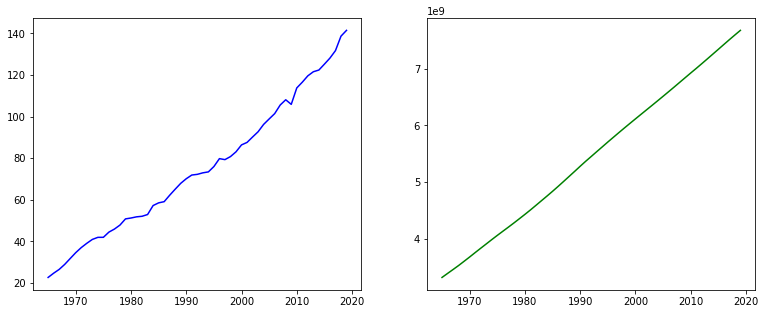

In [20]:
x_csmp = final_gas_csmp['Year']
y1_csmp = final_gas_csmp['World Exajoules']
y2_csmp = final_gas_csmp['World Population']

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(x_csmp, y1_csmp, color='b')
plt.subplot(132)
plt.plot(x_csmp, y2_csmp, color='g')
plt.show()

# Come back to add labels and customize ------------------------------------------------------------------------------------

In [21]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

### BEGIN SOLUTION
X_train_csmp, X_test_csmp, y_train_csmp, y_test_csmp = train_test_split(X_csmp, y_csmp, random_state=5)
### END SOLUTION

In [22]:
# Create the model

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model_csmp = LinearRegression()
### END SOLUTION

In [23]:
# Need the 'population' for year 2000 to predict 2001
world_gas_2000_csmp = final_gas_csmp.loc[final_gas_csmp['Year'] == 2000, 'World Population'].values.reshape(-1, 1) 
world_gas_2000_csmp.shape

(1, 1)

In [24]:
# Need the 'exajoules' for 2001 for actual comparison to the prediction
exajoules_2001_csmp = final_gas_csmp.loc[final_gas_csmp['Year'] == 2000, 'World Exajoules'].values.reshape(-1, 1)
exajoules_2001_csmp.shape

(1, 1)

In [25]:
# Fit the model to the data 
from sklearn.metrics import mean_squared_error, r2_score
fitment_csmp = model_csmp.fit(X_csmp, y_csmp)

predicted_csmp = fitment_csmp.predict(world_gas_2000_csmp)

print(f"Predicted Year 2000 Consumption: {predicted_csmp}")
print(f"Actual Year 2001 Consumption: {exajoules_2001_csmp}")

### BEGIN SOLUTION
# model.fit(X_train, y_train)
### END SOLUTION

Predicted Year 2000 Consumption: [[85.75668218]]
Actual Year 2001 Consumption: [[86.4]]


In [26]:
final_gas_csmp.loc[final_gas_csmp['Year'].between(1980, 2000), ['Year', 'World Population', 'World Exajoules']]

,Year,World Population,World Exajoules
15,1980,4432925590,51.26
16,1981,4511137170,51.82
17,1982,4592341169,52.09
18,1983,4674266079,52.93
19,1984,4755914211,57.25
20,1985,4839074592,58.54
21,1986,4924736807,59.11
22,1987,5012555212,62.21
23,1988,5101297281,65.12
24,1989,5189996799,67.93


## One-Step-Ahead Forecast

In [27]:
# A 'for loop' to run from years 2000-2009 to make predictions for 2001-2010 (historical testing) 
predict_01_10_csmp = []

for year in range(10): # range(10) = from 0 to 9
    start = 1980 + year
    end = 2000 + year

    xy_csmp = final_gas_csmp.loc[final_gas_csmp['Year'].between(start, end), ['World Population', 'World Exajoules', 'World GDP (%)', 'World Inflation (Annual %)', 'World Tax (% on Goods & Services)']]

    #     Does not need to be reshaped because there is more than 2 dimensions (features) for 'X_csmp'
    X_csmp = xy_csmp[['World Population', 'World Exajoules', 'World GDP (%)', 'World Inflation (Annual %)', 'World Tax (% on Goods & Services)']]
    y_csmp = xy_csmp["World Exajoules"].values.reshape(-1, 1)
    fitment_csmp = model_csmp.fit(X_csmp, y_csmp)
    
#     Does not need to be reshaped to (-1, 1) in the gas csmp prediction
    gas_csmp_predict = fitment_csmp.predict(X_csmp.iloc[20].values.reshape(1, -1))
    predict_01_10_csmp.append(gas_csmp_predict.flatten()[0])
    
print(predict_01_10_csmp)

[86.40000000000002, 87.58999999999999, 90.19, 92.71, 96.25000000000001, 98.87, 101.43000000000002, 105.57000000000001, 108.08999999999999, 105.88000000000002]


In [28]:
predict_01_10_csmp # printing from 2001-2010

[86.40000000000002,
 87.58999999999999,
 90.19,
 92.71,
 96.25000000000001,
 98.87,
 101.43000000000002,
 105.57000000000001,
 108.08999999999999,
 105.88000000000002]

In [29]:
actual_01_10_csmp = final_gas_csmp['World Exajoules'][35:55] # printing from 2000-2019
actual_01_10_csmp

35     86.40
36     87.59
37     90.19
38     92.71
39     96.25
40     98.87
41    101.43
42    105.57
43    108.09
44    105.88
45    113.78
46    116.54
47    119.59
48    121.56
49    122.38
50    125.21
51    128.12
52    131.71
53    138.66
54    141.45
Name: World Exajoules, dtype: float64

In [30]:
actual_01_10_csmp = final_gas_csmp.loc[final_gas_csmp['Year'].between(2001, 2010), ['Year', 'World Exajoules']]
actual_01_10_csmp

,Year,World Exajoules
36,2001,87.59
37,2002,90.19
38,2003,92.71
39,2004,96.25
40,2005,98.87
41,2006,101.43
42,2007,105.57
43,2008,108.09
44,2009,105.88
45,2010,113.78


In [31]:
# Adding historical comparisons of predictions to view against actual values
historical_comps = final_gas_csmp.loc[final_gas_csmp['Year'].between(2001, 2010), ['Year', 'World Exajoules']]
historical_comps["2001-2010 Predictions"] = predict_01_10_csmp
# historical_comps["2001-2010 Actuals"] = actual_01_10_csmp
historical_comps["Difference"] = historical_comps["2001-2010 Predictions"] - historical_comps["World Exajoules"]
historical_comps["% Difference"] = ((historical_comps["2001-2010 Predictions"] - historical_comps["World Exajoules"])/historical_comps["World Exajoules"])*100
historical_comps

,Year,World Exajoules,2001-2010 Predictions,Difference,% Difference
36,2001,87.59,86.40,-1.19,-1.358603
37,2002,90.19,87.59,-2.60,-2.882803
38,2003,92.71,90.19,-2.52,-2.718153
39,2004,96.25,92.71,-3.54,-3.677922
40,2005,98.87,96.25,-2.62,-2.649944
41,2006,101.43,98.87,-2.56,-2.523908
42,2007,105.57,101.43,-4.14,-3.921569
43,2008,108.09,105.57,-2.52,-2.331391
44,2009,105.88,108.09,2.21,2.087269
45,2010,113.78,105.88,-7.90,-6.943224
